In [313]:
#prepare by Mohammad Kangazian
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy import stats

In [314]:
train_data=pd.read_csv('Train_dataxy.csv')
train_data



,OBJECTID,Id,Elevation,Slope,Aspect,TWI,RiverDista,RiverDensi,Rainfall,Lithology,Landuse,Longitude,Latitude
0,1,0,1335,17.45,7,7,0.00,1.08,692.54,5,4,398290.38,4146676.77
1,2,0,590,13.66,6,7,100.00,1.42,682.11,5,4,396353.44,4137844.59
2,3,0,824,21.32,5,0,360.56,1.24,648.55,5,4,399363.15,4136873.35
3,4,0,692,40.23,7,0,100.00,1.59,614.22,5,4,402320.33,4137711.19
4,5,0,942,24.43,6,7,447.21,1.36,560.45,5,4,405750.18,4137560.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,404,1,972,39.63,9,-1,200.00,1.41,443.23,5,4,412223.09,4135095.72
399,405,1,1139,39.28,6,7,0.00,1.28,422.14,5,4,413747.93,4135015.47
400,406,1,930,10.32,3,2,100.00,1.24,444.32,5,4,411661.31,4133992.22
401,407,1,914,15.83,7,7,100.00,1.35,438.17,5,4,412022.46,4133570.88


In [315]:
test_data=pd.read_csv('adata1.csv')
Test_data=test_data.copy()
test_data


,Id,Elevation,Slope,Aspect,TWI,RiverDista,RiverDensi,Rainfall,Lithology,Landuse,Longitude,Latitude
0,0.0,375.0,7.75,5.0,-1.0,989.95,0.00,689.40,5.0,1.0,369617.37,4136089.73
1,1.0,368.0,8.41,5.0,1.0,921.95,0.00,689.40,5.0,1.0,369717.37,4136089.73
2,2.0,362.0,13.06,3.0,0.0,848.53,0.00,688.20,5.0,1.0,369817.37,4136089.73
3,3.0,337.0,14.04,3.0,0.0,781.03,0.00,687.81,5.0,1.0,369917.37,4136089.73
4,4.0,355.0,18.88,4.0,7.0,721.11,0.11,687.05,5.0,1.0,370017.37,4136089.73
...,...,...,...,...,...,...,...,...,...,...,...,...
61820,61820.0,1865.0,5.88,5.0,7.0,500.00,0.10,382.20,5.0,4.0,421117.37,4135989.73
61821,61821.0,1854.0,11.80,5.0,1.0,583.10,0.06,381.97,5.0,4.0,421217.37,4135989.73
61822,61822.0,1869.0,4.38,7.0,7.0,670.82,0.02,381.77,5.0,4.0,421317.37,4135989.73
61823,61823.0,1878.0,20.89,8.0,7.0,761.58,0.00,381.68,5.0,4.0,421417.37,4135989.73


In [316]:
train_data.isna().sum()

OBJECTID      0
Id            0
Elevation     0
Slope         0
Aspect        0
TWI           0
RiverDista    0
RiverDensi    0
Rainfall      0
Lithology     0
Landuse       0
Longitude     0
Latitude      0
dtype: int64

In [317]:
train_data.duplicated().sum()
train_data.describe()
train_data

,OBJECTID,Id,Elevation,Slope,Aspect,TWI,RiverDista,RiverDensi,Rainfall,Lithology,Landuse,Longitude,Latitude
0,1,0,1335,17.45,7,7,0.00,1.08,692.54,5,4,398290.38,4146676.77
1,2,0,590,13.66,6,7,100.00,1.42,682.11,5,4,396353.44,4137844.59
2,3,0,824,21.32,5,0,360.56,1.24,648.55,5,4,399363.15,4136873.35
3,4,0,692,40.23,7,0,100.00,1.59,614.22,5,4,402320.33,4137711.19
4,5,0,942,24.43,6,7,447.21,1.36,560.45,5,4,405750.18,4137560.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,404,1,972,39.63,9,-1,200.00,1.41,443.23,5,4,412223.09,4135095.72
399,405,1,1139,39.28,6,7,0.00,1.28,422.14,5,4,413747.93,4135015.47
400,406,1,930,10.32,3,2,100.00,1.24,444.32,5,4,411661.31,4133992.22
401,407,1,914,15.83,7,7,100.00,1.35,438.17,5,4,412022.46,4133570.88


In [318]:
import numpy as np
numerica_col=train_data.select_dtypes(include=[np.number])
df_c=train_data[(np.abs(stats.zscore(numerica_col))<3).all(axis=1)]
train_data.shape

(403, 13)

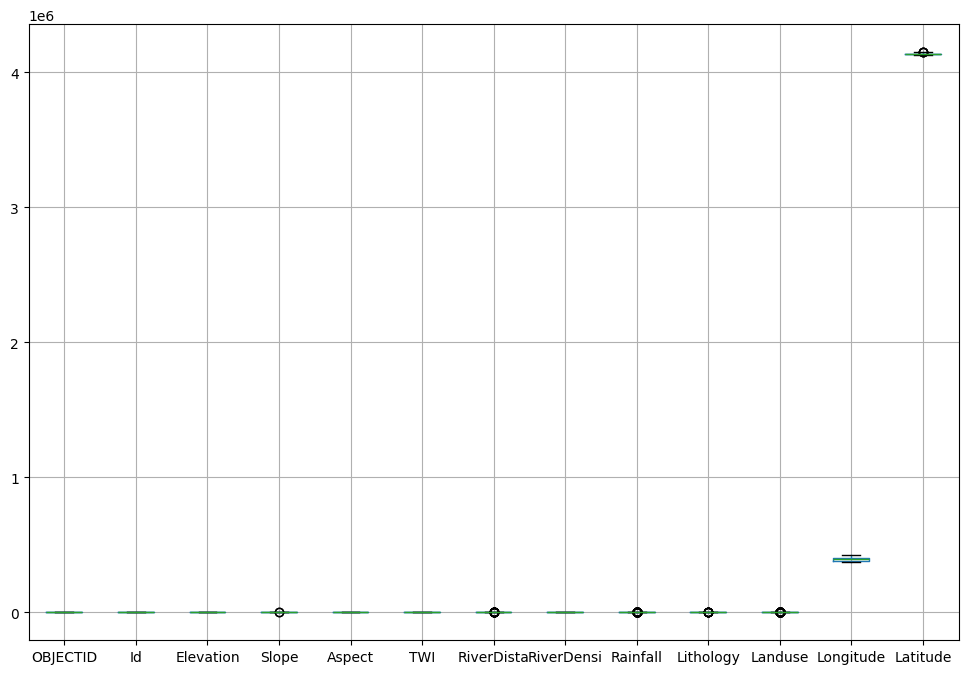

In [319]:
train_data_modified=train_data.drop(['OBJECTID','Id','Longitude','Latitude','Aspect','TWI'],axis=1)
train_data_modified['Aspect']=train_data['Aspect']
train_data_modified['TWI']=train_data['TWI']
train_data_modified
test_data_modified=test_data.drop(['Id','Longitude','Latitude','Aspect','TWI'],axis=1)
test_data_modified['Aspect']=test_data['Aspect']
test_data_modified['TWI']=test_data['TWI']
test_data_modified
train_data.boxplot(figsize=(12,8))
plt.show()

In [320]:
#one hot codeing(train_data)
Select_columns=['Landuse','Aspect']
one_hot_encoded_data=pd.get_dummies(train_data_modified[Select_columns],columns=Select_columns)
one_hot_encoded_data=one_hot_encoded_data.astype(int)
train_data_modified_encoded=pd.concat([train_data_modified.drop(columns=Select_columns),one_hot_encoded_data],axis=1)
train_data_modified_encoded.columns


Index(['Elevation', 'Slope', 'RiverDista', 'RiverDensi', 'Rainfall',
       'Lithology', 'TWI', 'Landuse_0', 'Landuse_1', 'Landuse_2', 'Landuse_3',
       'Landuse_4', 'Aspect_1', 'Aspect_2', 'Aspect_3', 'Aspect_4', 'Aspect_5',
       'Aspect_6', 'Aspect_7', 'Aspect_8', 'Aspect_9'],
      dtype='object')

In [321]:

one_hot_encoded_data_T=pd.get_dummies(test_data_modified[Select_columns],columns=Select_columns)
one_hot_encoded_data_T=one_hot_encoded_data_T.astype(int)
test_data_modified_encoded=pd.concat([test_data_modified.drop(columns=Select_columns),one_hot_encoded_data_T],axis=1)
test_data_modified_encoded.columns


Index(['Elevation', 'Slope', 'RiverDista', 'RiverDensi', 'Rainfall',
       'Lithology', 'TWI', 'Landuse_0.0', 'Landuse_1.0', 'Landuse_2.0',
       'Landuse_3.0', 'Landuse_4.0', 'Aspect_1.0', 'Aspect_2.0', 'Aspect_3.0',
       'Aspect_4.0', 'Aspect_5.0', 'Aspect_6.0', 'Aspect_7.0', 'Aspect_8.0',
       'Aspect_9.0'],
      dtype='object')

In [327]:
test_data_modified_encoded.columns=test_data_modified_encoded.columns.str.replace('.0','',regex=True)
test_data_modified_encoded.columns

Index(['Elevation', 'Slope', 'RiverDista', 'RiverDensi', 'Rainfall',
       'Lithology', 'TWI', 'Landuse', 'Landuse_1', 'Landuse_2', 'Landuse_3',
       'Landuse_4', 'Aspect_1', 'Aspect_2', 'Aspect_3', 'Aspect_4', 'Aspect_5',
       'Aspect_6', 'Aspect_7', 'Aspect_8', 'Aspect_9'],
      dtype='object')

In [328]:
train_data_modified_encoded.columns=train_data_modified_encoded.columns.str.replace('.0','',regex=True)
train_data_modified_encoded.columns

Index(['Elevation', 'Slope', 'RiverDista', 'RiverDensi', 'Rainfall',
       'Lithology', 'TWI', 'Landuse', 'Landuse_1', 'Landuse_2', 'Landuse_3',
       'Landuse_4', 'Aspect_1', 'Aspect_2', 'Aspect_3', 'Aspect_4', 'Aspect_5',
       'Aspect_6', 'Aspect_7', 'Aspect_8', 'Aspect_9'],
      dtype='object')

In [329]:
#Normalization of the population column
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
train_data_modified_encoded.iloc[:,:-16]=scaler.fit_transform(train_data_modified_encoded.iloc[:,:-16])
test_data_modified_encoded.iloc[:,:-16]=scaler.fit_transform(test_data_modified_encoded.iloc[:,:-16])

train_data_modified_encoded

,Elevation,Slope,RiverDista,RiverDensi,Rainfall,Lithology,TWI,Landuse,Landuse_1,Landuse_2,...,Landuse_4,Aspect_1,Aspect_2,Aspect_3,Aspect_4,Aspect_5,Aspect_6,Aspect_7,Aspect_8,Aspect_9
0,0.603101,0.303208,0.000000,0.440816,0.877587,5,7,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0.218088,0.236045,0.062017,0.579592,0.848497,5,7,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0.339018,0.371788,0.223610,0.506122,0.754895,5,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0.270801,0.706893,0.062017,0.648980,0.659145,5,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.400000,0.426901,0.277348,0.555102,0.509176,5,7,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,0.415504,0.696261,0.124035,0.575510,0.182239,5,-1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
399,0.501809,0.690058,0.000000,0.522449,0.123417,5,7,0,0,0,...,1,0,0,0,0,0,1,0,0,0
400,0.393798,0.176856,0.062017,0.506122,0.185279,5,2,0,0,0,...,1,0,0,1,0,0,0,0,0,0
401,0.385530,0.274499,0.062017,0.551020,0.168126,5,7,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [277]:
test_data_modified_encoded

,Elevation,Slope,RiverDista,RiverDensi,Rainfall,Lithology,TWI,Landuse_0.0,Landuse_1.0,Landuse_2.0,...,Landuse_4.0,Aspect_1.0,Aspect_2.0,Aspect_3.0,Aspect_4.0,Aspect_5.0,Aspect_6.0,Aspect_7.0,Aspect_8.0,Aspect_9.0
0,0.099498,0.110746,0.440522,0.000000,0.866248,5.0,-1.0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.096303,0.120177,0.410262,0.000000,0.866248,5.0,1.0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,0.093565,0.186625,0.377591,0.000000,0.862960,5.0,0.0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,0.082154,0.200629,0.347554,0.000000,0.861891,5.0,0.0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0.090370,0.269791,0.320890,0.043478,0.859809,5.0,7.0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61820,0.779553,0.084024,0.222497,0.039526,0.024443,5.0,7.0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
61821,0.774532,0.168620,0.259476,0.023715,0.023813,5.0,1.0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
61822,0.781378,0.062589,0.298511,0.007905,0.023265,5.0,7.0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
61823,0.785486,0.298514,0.338899,0.000000,0.023018,5.0,7.0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [330]:
# training  model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X=train_data_modified_encoded
Y=train_data['Id']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

model=RandomForestRegressor(n_estimators=400,max_depth=20,min_samples_split=10,min_samples_leaf=2,max_features=5,random_state=42,oob_score=True)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)



In [331]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('mean_absolute_error=',mae)
print('mean_squared_error=',mse)
print('r2_score=',r2)





mean_absolute_error= 0.30081022447991795
mean_squared_error= 0.1496614390703232
r2_score= 0.40126298674366445


In [332]:
y_pred_T=model.predict(test_data_modified_encoded)
y_pred_T

array([0.29703787, 0.28642637, 0.2160084 , ..., 0.09104318, 0.05747259,
       0.08190993])

In [333]:
test_data['RF']=y_pred_T
test_data

,Id,Elevation,Slope,Aspect,TWI,RiverDista,RiverDensi,Rainfall,Lithology,Landuse,Longitude,Latitude,RF
0,0.0,375.0,7.75,5.0,-1.0,989.95,0.00,689.40,5.0,1.0,369617.37,4136089.73,0.297038
1,1.0,368.0,8.41,5.0,1.0,921.95,0.00,689.40,5.0,1.0,369717.37,4136089.73,0.286426
2,2.0,362.0,13.06,3.0,0.0,848.53,0.00,688.20,5.0,1.0,369817.37,4136089.73,0.216008
3,3.0,337.0,14.04,3.0,0.0,781.03,0.00,687.81,5.0,1.0,369917.37,4136089.73,0.224567
4,4.0,355.0,18.88,4.0,7.0,721.11,0.11,687.05,5.0,1.0,370017.37,4136089.73,0.201522
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61820,61820.0,1865.0,5.88,5.0,7.0,500.00,0.10,382.20,5.0,4.0,421117.37,4135989.73,0.113813
61821,61821.0,1854.0,11.80,5.0,1.0,583.10,0.06,381.97,5.0,4.0,421217.37,4135989.73,0.078639
61822,61822.0,1869.0,4.38,7.0,7.0,670.82,0.02,381.77,5.0,4.0,421317.37,4135989.73,0.091043
61823,61823.0,1878.0,20.89,8.0,7.0,761.58,0.00,381.68,5.0,4.0,421417.37,4135989.73,0.057473


In [334]:
boundry=gpd.read_file('Boundry.shp')
river=gpd.read_file('River.shp')
tr=gpd.read_file('TrainData.shp')

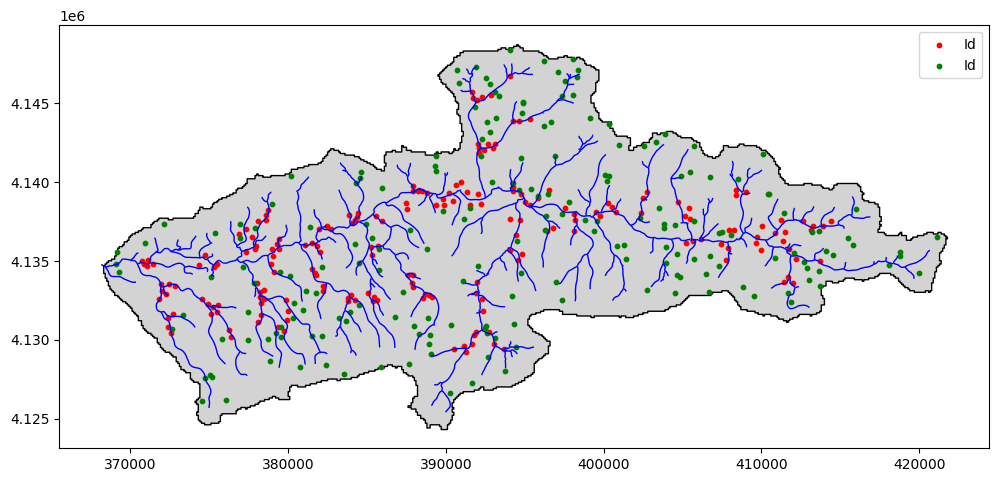

In [335]:
fig, ax=plt.subplots(figsize=(12,8))
river.plot(ax=ax,color='blue',linewidth=1)
boundry.plot(ax=ax,color='lightgrey',edgecolor='black')
p_z=tr[tr['Id']==0]
p_o=tr[tr['Id']==1]
p_o.plot(ax=ax,color='red',label='Id',markersize=10)
p_z.plot(ax=ax,color='green',label='Id',markersize=10)
plt.legend()
plt.show()

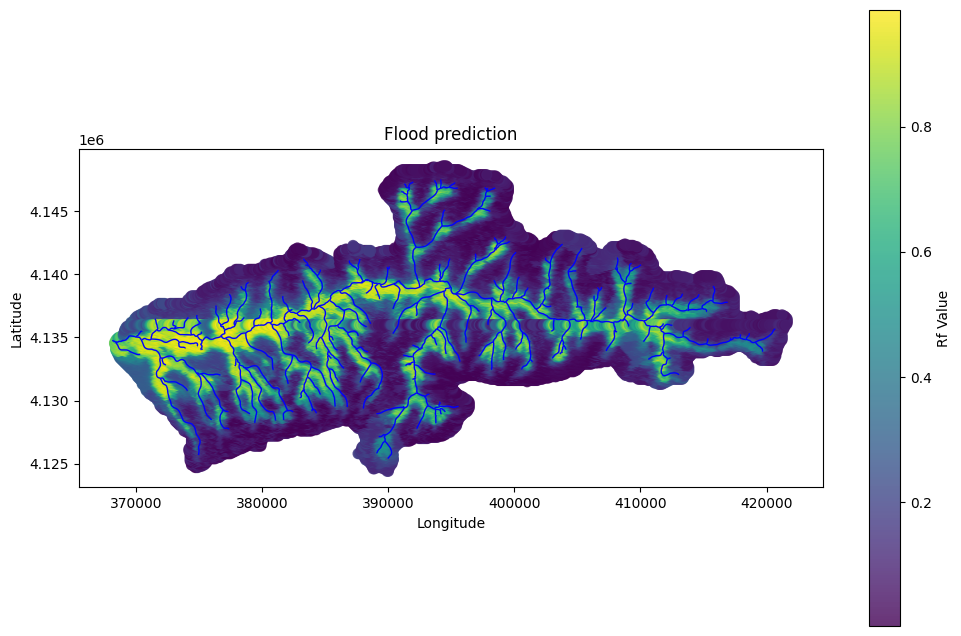

In [336]:

longitude = test_data['Longitude']
latitude = test_data['Latitude']
rf_values = test_data['RF']

fig, ax=plt.subplots(figsize=(12,8))
boundry.plot(ax=ax,color='lightgrey',edgecolor='black')
river.plot(ax=ax,color='blue',linewidth=1)
scatter = plt.scatter(longitude,latitude,c=rf_values,cmap='viridis',s=50,alpha=0.8)  
plt.colorbar(scatter, label='Rf Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Flood prediction')
plt.show()